In [1]:
import pandas as pd
import os

#-----------------------------------------------------Extract Budget Exploitation  -------------------------------------------------

In [2]:
header = ['Comptes N','intitulees des comptes','credit ouvert','engagement','disponible_engagement','paiement','reste a payer','chapitre']
files_list = os.listdir('Budget_Exploitation')
budget_ex  = pd.DataFrame({})
for file in files_list :
    print(file) 
    year = file[file.find("2"):file.find(".")]
    df = pd.read_excel('Budget_Exploitation/'+file)
    if year in ['2022','2021','2020']:
            df = df.reindex(columns=['N° de compte','Intitulé','Credit Ouvert','ENGAGEMENTS','DISPONIBLE','PAIEMENT','RESTE A PAYER','chapitre'])
    df.columns = header
    df['Annee'] = year+"-12-31"
    budget_ex = pd.concat([budget_ex,df])

Exploitation_2017.xlsx
Exploitation_2018.xlsx
Exploitation_2019.xlsx
Exploitation_2020.xlsx
Exploitation_2021.xlsx
Exploitation_2022.xlsx


In [395]:
budget_ex.shape

(342, 9)

In [396]:
budget_ex.columns

Index(['Comptes N', 'intitulees des comptes', 'credit ouvert', 'engagement',
       'disponible_engagement', 'paiement', 'reste a payer', 'chapitre',
       'Annee'],
      dtype='object')

#-----------------------------------------------------Trasform Budget Exploitation  -------------------------------------------------

In [397]:
budget_ex.reset_index(drop=True,inplace=True)

In [398]:
budget_ex.columns = [col.upper() for col in budget_ex.columns]

In [399]:
budget_ex.columns = budget_ex.columns.str.replace(' ','_')

In [3]:
budget_ex.head()

,Comptes N,intitulees des comptes,credit ouvert,engagement,disponible_engagement,paiement,reste a payer,chapitre,Annee
0,61223.0,Achat de combustibles,250000.0,100000.00,0.00,250000.0,0.00,Achats de matières et de fournitures consommables,2017-12-31
1,NaN,NaN,NaN,150000.00,NaN,NaN,NaN,Achats de matières et de fournitures consommables,2017-12-31
2,61227011.0,Achat de fournitures de bureau,122530.0,122529.70,0.30,0.0,122529.70,Achats de matières et de fournitures consommables,2017-12-31
3,61227012.0,Fourniture pour matériel technique et informat...,8345.0,8344.44,0.56,0.0,8344.44,Achats de matières et de fournitures consommables,2017-12-31
4,61227013.0,Fourniture de produits d'impression de reprodu...,129125.0,51042.90,295.70,0.0,128829.30,Achats de matières et de fournitures consommables,2017-12-31


In [401]:
budget_ex['ANNEE'].value_counts()

2019-12-31    92
2018-12-31    59
2017-12-31    50
2021-12-31    50
2020-12-31    46
2022-12-31    45
Name: ANNEE, dtype: int64

In [402]:
budget_ex[budget_ex['COMPTES_N'].isna()]

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE
1,NaN,NaN,NaN,150000.0,NaN,NaN,NaN,Achats de matières et de fournitures consommables,2017-12-31
5,NaN,NaN,NaN,77786.4,NaN,NaN,NaN,Achats de matières et de fournitures consommables,2017-12-31
8,NaN,NaN,NaN,42000.0,NaN,42000.0,NaN,Locations,2017-12-31
9,NaN,NaN,NaN,24000.0,NaN,24000.0,NaN,Locations,2017-12-31
10,NaN,NaN,NaN,36000.0,NaN,36000.0,NaN,Locations,2017-12-31
...,...,...,...,...,...,...,...,...,...
179,NaN,NaN,NaN,129000.0,NaN,129000.0,NaN,"Publicité,publications et relations publiques",2019-12-31
180,NaN,NaN,NaN,55000.0,NaN,55000.0,NaN,"Publicité,publications et relations publiques",2019-12-31
187,NaN,NaN,NaN,62748.0,NaN,0.0,NaN,Charges Sociales,2019-12-31
200,NaN,NaN,NaN,350000.0,NaN,NaN,NaN,NaN,2019-12-31


In [403]:
budget_ex.dropna(how="any",subset=['COMPTES_N','CHAPITRE'],inplace=True)

In [404]:
budget_ex[budget_ex['CHAPITRE'].isna()]

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE


In [405]:
budget_ex[budget_ex['CHAPITRE'].isna()]['ANNEE'].value_counts()

Series([], Name: ANNEE, dtype: int64)

In [406]:
# Drop NaN rows :
budget_ex.dropna(how="all",subset=['COMPTES_N','INTITULEES_DES_COMPTES','ENGAGEMENT','DISPONIBLE_ENGAGEMENT'],inplace=True)

In [407]:
#  - Convert the column ANNEE data type to datetime :
budget_ex['ANNEE'] = pd.to_datetime(budget_ex['ANNEE'])

In [408]:
budget_ex.dtypes

COMPTES_N                         object
INTITULEES_DES_COMPTES            object
CREDIT_OUVERT                    float64
ENGAGEMENT                       float64
DISPONIBLE_ENGAGEMENT            float64
PAIEMENT                         float64
RESTE_A_PAYER                    float64
CHAPITRE                          object
ANNEE                     datetime64[ns]
dtype: object

In [409]:
budget_ex.head(2)

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE
0,61223.0,Achat de combustibles,250000.0,100000.0,0.0,250000.0,0.0,Achats de matières et de fournitures consommables,2017-12-31
2,61227011.0,Achat de fournitures de bureau,122530.0,122529.7,0.3,0.0,122529.7,Achats de matières et de fournitures consommables,2017-12-31


In [410]:
budget_ex['COMPTES_N'] = budget_ex['COMPTES_N'].astype(str).str.replace('/','')
budget_ex['COMPTES_N'] = budget_ex['COMPTES_N'].astype(str).str.replace('.0','')
budget_ex['COMPTES_N'] = budget_ex['COMPTES_N'].astype(str).str.replace(' ','')

C:\Users\tioua\AppData\Local\Temp\ipykernel_9672\3020339210.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  budget_ex['COMPTES_N'] = budget_ex['COMPTES_N'].astype(str).str.replace('.0','')


In [411]:
budget_ex['COMPTES_N'] = budget_ex['COMPTES_N'].astype('Int64')

In [412]:
budget_ex.fillna(0,inplace=True)

In [413]:
budget_ex.head()

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE
0,61223,Achat de combustibles,250000.0,100000.00,0.00,250000.0,0.00,Achats de matières et de fournitures consommables,2017-12-31
2,612211,Achat de fournitures de bureau,122530.0,122529.70,0.30,0.0,122529.70,Achats de matières et de fournitures consommables,2017-12-31
3,612212,Fourniture pour matériel technique et informat...,8345.0,8344.44,0.56,0.0,8344.44,Achats de matières et de fournitures consommables,2017-12-31
4,612213,Fourniture de produits d'impression de reprodu...,129125.0,51042.90,295.70,0.0,128829.30,Achats de matières et de fournitures consommables,2017-12-31
6,61263,Prestations d'impression et reproduction photo...,120000.0,120000.00,0.00,0.0,120000.00,Prestations de services,2017-12-31


In [414]:
# - Modify Egagement Column : 
budget_ex['ENGAGEMENT'] = (budget_ex['CREDIT_OUVERT']-budget_ex['DISPONIBLE_ENGAGEMENT'])

In [415]:
budget_ex.head()

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE
0,61223,Achat de combustibles,250000.0,250000.00,0.00,250000.0,0.00,Achats de matières et de fournitures consommables,2017-12-31
2,612211,Achat de fournitures de bureau,122530.0,122529.70,0.30,0.0,122529.70,Achats de matières et de fournitures consommables,2017-12-31
3,612212,Fourniture pour matériel technique et informat...,8345.0,8344.44,0.56,0.0,8344.44,Achats de matières et de fournitures consommables,2017-12-31
4,612213,Fourniture de produits d'impression de reprodu...,129125.0,128829.30,295.70,0.0,128829.30,Achats de matières et de fournitures consommables,2017-12-31
6,61263,Prestations d'impression et reproduction photo...,120000.0,120000.00,0.00,0.0,120000.00,Prestations de services,2017-12-31


In [416]:
# - Modify Paiement Column : 
budget_ex['PAIEMENT'] = (budget_ex['ENGAGEMENT']-budget_ex['RESTE_A_PAYER'])

In [417]:
budget_ex.head()

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE
0,61223,Achat de combustibles,250000.0,250000.00,0.00,250000.0,0.00,Achats de matières et de fournitures consommables,2017-12-31
2,612211,Achat de fournitures de bureau,122530.0,122529.70,0.30,0.0,122529.70,Achats de matières et de fournitures consommables,2017-12-31
3,612212,Fourniture pour matériel technique et informat...,8345.0,8344.44,0.56,0.0,8344.44,Achats de matières et de fournitures consommables,2017-12-31
4,612213,Fourniture de produits d'impression de reprodu...,129125.0,128829.30,295.70,0.0,128829.30,Achats de matières et de fournitures consommables,2017-12-31
6,61263,Prestations d'impression et reproduction photo...,120000.0,120000.00,0.00,0.0,120000.00,Prestations de services,2017-12-31


In [418]:
budget_ex.tail()

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE
337,61611,Dépenses liées aux impots et taxes directs,240000.0,237134.3,2865.7,237134.3,0.0,Impots et taxes,2022-12-31
338,61673,Taxe spéciale annuelle sur les véhicules autom...,13150.0,13150.0,0.0,13150.0,0.0,Impots et taxes,2022-12-31
339,61441,"Annonces,Abonnements,insertions,accés base de ...",29500.0,23400.0,6100.0,4800.0,18600.0,"Publicité,publications et relations publiques",2022-12-31
340,61444,Publicité et communication,70500.0,70008.0,492.0,70008.0,0.0,"Publicité,publications et relations publiques",2022-12-31
341,61448,"Infogérance,siteweb,assistance et numérisation",50000.0,50000.0,0.0,0.0,50000.0,"Publicité,publications et relations publiques",2022-12-31


In [419]:
budget_ex.drop_duplicates(inplace=True)

In [420]:
budget_ex.isna().value_counts()

COMPTES_N  INTITULEES_DES_COMPTES  CREDIT_OUVERT  ENGAGEMENT  DISPONIBLE_ENGAGEMENT  PAIEMENT  RESTE_A_PAYER  CHAPITRE  ANNEE
False      False                   False          False       False                  False     False          False     False    251
dtype: int64

In [421]:
budget_ex[budget_ex['ENGAGEMENT'].isna()]

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE


In [422]:
budget_ex[budget_ex['PAIEMENT'].isna()]

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE


In [423]:
budget_ex[budget_ex['CHAPITRE'].isna()]

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE


In [424]:
budget_ex.describe()

,COMPTES_N,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER
count,251.0,2.510000e+02,2.510000e+02,2.510000e+02,2.510000e+02,251.000000
mean,49719828.486056,3.053524e+05,2.768284e+05,2.852395e+04,2.566086e+05,20219.817809
std,549355887.100787,9.136848e+05,8.262792e+05,1.260300e+05,8.180609e+05,46166.086601
min,6176.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,61354.5,2.500000e+04,1.999874e+04,0.000000e+00,3.000000e+02,0.000000
50%,61448.0,8.000000e+04,7.738189e+04,1.645000e+01,4.992000e+04,0.000000
75%,61768.0,2.200000e+05,2.098413e+05,4.282030e+03,2.049206e+05,10000.000000
max,6167161672.0,8.010000e+06,7.566096e+06,1.175614e+06,7.566096e+06,249948.000000


In [425]:
budget_ex.dtypes

COMPTES_N                          Int64
INTITULEES_DES_COMPTES            object
CREDIT_OUVERT                    float64
ENGAGEMENT                       float64
DISPONIBLE_ENGAGEMENT            float64
PAIEMENT                         float64
RESTE_A_PAYER                    float64
CHAPITRE                          object
ANNEE                     datetime64[ns]
dtype: object

In [426]:
filt = (budget_ex['CREDIT_OUVERT']==0) #| (budget_ex['ENGAGEMENT']==0)

In [427]:
drp = list(budget_ex.loc[filt,'COMPTES_N'].index)

In [428]:
drp

[86, 89, 212, 221, 229, 236, 240, 276, 286, 287, 303, 308, 319]

In [429]:
budget_ex.drop(index=drp,inplace=True)

Verifcation Data / Data Validation :  --------

In [430]:
budget_ex.isna().value_counts()

COMPTES_N  INTITULEES_DES_COMPTES  CREDIT_OUVERT  ENGAGEMENT  DISPONIBLE_ENGAGEMENT  PAIEMENT  RESTE_A_PAYER  CHAPITRE  ANNEE
False      False                   False          False       False                  False     False          False     False    238
dtype: int64

In [431]:
budget_ex.shape

(238, 9)

In [432]:
budget_ex.duplicated().value_counts()

False    238
dtype: int64

In [433]:
#Verify if there is negative values :
for k,v in dict(budget_ex.dtypes).items():  
    try : 
        if v!='object':
            print((budget_ex[k] < 0).value_counts())
    except:
        pass

False    238
Name: COMPTES_N, dtype: Int64
False    238
Name: CREDIT_OUVERT, dtype: int64
False    238
Name: ENGAGEMENT, dtype: int64
False    238
Name: DISPONIBLE_ENGAGEMENT, dtype: int64
False    238
Name: PAIEMENT, dtype: int64
False    238
Name: RESTE_A_PAYER, dtype: int64


In [434]:
# Statistique descriptive : 
budget_ex.describe()

,COMPTES_N,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER
count,238.0,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,238.000000
mean,52399742.756303,3.220313e+05,2.919493e+05,3.008198e+04,2.706251e+05,21324.261639
std,564097938.275509,9.355308e+05,8.460224e+05,1.292584e+05,8.379278e+05,47165.282730
min,6176.0,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,61354.0,4.000000e+04,2.699331e+04,0.000000e+00,9.964740e+03,0.000000
50%,61448.0,8.000000e+04,7.999600e+04,2.092000e+01,5.000000e+04,0.000000
75%,61768.0,2.400000e+05,2.200000e+05,5.025000e+03,2.101178e+05,19590.000000
max,6167161672.0,8.010000e+06,7.566096e+06,1.175614e+06,7.566096e+06,249948.000000


In [435]:
#Range checking
(budget_ex['ENGAGEMENT']>budget_ex['CREDIT_OUVERT']).value_counts()

False    238
dtype: int64

In [436]:
#format checking  :
budget_ex['ANNEE'].unique()

array(['2017-12-31T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2022-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [437]:
# check creadit_ouvert equal = 0
budget_ex[budget_ex['CREDIT_OUVERT']==0]

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE


In [438]:
budget_ex[budget_ex['ANNEE'].dt.year==2017].groupby(by=['INTITULEES_DES_COMPTES'])['PAIEMENT','RESTE_A_PAYER'].sum().sort_values(by=['PAIEMENT','RESTE_A_PAYER'],ascending=False)

C:\Users\tioua\AppData\Local\Temp\ipykernel_9672\337083904.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  budget_ex[budget_ex['ANNEE'].dt.year==2017].groupby(by=['INTITULEES_DES_COMPTES'])['PAIEMENT','RESTE_A_PAYER'].sum().sort_values(by=['PAIEMENT','RESTE_A_PAYER'],ascending=False)


,PAIEMENT,RESTE_A_PAYER
INTITULEES_DES_COMPTES,,
Location de bâtiments administratifs et charges locatives,600000.00,0.00
Voyages et déplacements,319960.00,190020.00
Achat de combustibles,250000.00,0.00
"Rémunération du personnel extérieur ( accueil,gardiennage et sécurité )",222421.23,22506.91
Frais de téléphone et fax,165000.00,55000.00
Entretien et réparation de matériel de transport,145000.00,0.00
Rémunération du personnel extérieur ( Nettoyage ),77162.81,0.00
Assurances matériel de transport,23458.52,0.00
Péage d'autoroute,20000.00,0.00


In [439]:
pd.DataFrame(budget_ex[budget_ex['ANNEE'].dt.year==2017].groupby(by=['INTITULEES_DES_COMPTES'])['ENGAGEMENT'].sum().sort_values(ascending=False))

,ENGAGEMENT
INTITULEES_DES_COMPTES,
Location de bâtiments administratifs et charges locatives,600000.00
Voyages et déplacements,509980.00
Achat de combustibles,250000.00
"Rémunération du personnel extérieur ( accueil,gardiennage et sécurité )",244928.14
Frais de téléphone et fax,220000.00
Formation professionnelle,200000.00
Réceptions et hebergements,159996.64
"Honoraires ( Avocats, Commissariat aux comptes, experts et Consultants)",150000.00
Entretien et réparation de matériel de transport,145000.00


In [440]:
budget_ex['ANNEE'].value_counts()

2019-12-31    48
2021-12-31    46
2022-12-31    41
2020-12-31    40
2018-12-31    33
2017-12-31    30
Name: ANNEE, dtype: int64

-------------------------------------  Load Budget Exploitation vers  SQL Server : ---------------------------------------

In [442]:
budget_ex.head()

,COMPTES_N,INTITULEES_DES_COMPTES,CREDIT_OUVERT,ENGAGEMENT,DISPONIBLE_ENGAGEMENT,PAIEMENT,RESTE_A_PAYER,CHAPITRE,ANNEE
0,61223,Achat de combustibles,250000.0,250000.00,0.00,250000.0,0.00,Achats de matières et de fournitures consommables,2017-12-31
2,612211,Achat de fournitures de bureau,122530.0,122529.70,0.30,0.0,122529.70,Achats de matières et de fournitures consommables,2017-12-31
3,612212,Fourniture pour matériel technique et informat...,8345.0,8344.44,0.56,0.0,8344.44,Achats de matières et de fournitures consommables,2017-12-31
4,612213,Fourniture de produits d'impression de reprodu...,129125.0,128829.30,295.70,0.0,128829.30,Achats de matières et de fournitures consommables,2017-12-31
6,61263,Prestations d'impression et reproduction photo...,120000.0,120000.00,0.00,0.0,120000.00,Prestations de services,2017-12-31


In [443]:
import sqlalchemy

In [444]:
server_name = 'DESKTOP-LORG5OV'
database_name = 'Agence_Urbaine'
driver = 'SQL+Server'
conn_str = f'mssql://{server_name}/{database_name}?driver={driver}'
engine = sqlalchemy.create_engine(conn_str)

In [445]:
budget_ex.to_sql('Budget_Exploitation', engine, if_exists='replace', index=False)

-1

In [446]:
x = list(dict(budget_ex.groupby(by=['ANNEE'])['CREDIT_OUVERT'].sum()).keys())

In [447]:
x

[Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-12-31 00:00:00'),
 Timestamp('2020-12-31 00:00:00'),
 Timestamp('2021-12-31 00:00:00'),
 Timestamp('2022-12-31 00:00:00')]

In [448]:
y = list(dict(budget_ex.groupby(by=['ANNEE'])['CREDIT_OUVERT'].sum()).values())

In [449]:
y

[3735535.0, 7185535.0, 15904535.0, 14332000.0, 18019295.49, 17466550.0]

In [450]:
import matplotlib.pyplot as plt

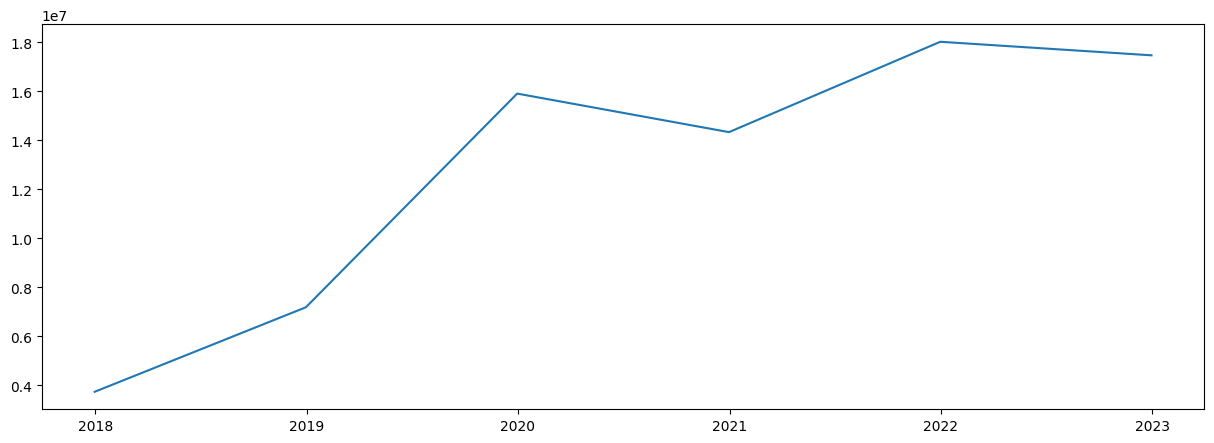

In [451]:
plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.show()

#---------------------------------------------------------------------------------------------------------------------------------------------------


-------------------------------------  Extract Budget Invistissement : ---------------------------------------

In [65]:
files_list = os.listdir('Budget_Investissement')
budget_inves  = pd.DataFrame({})
for file in files_list :
    print(file) 
    year = file[file.find("2"):file.find(".")]
    df = pd.read_excel('Budget_Investissement/'+file)
    if year in ['2017','2018','2019']:
        df.columns=['N° de compte','Intitulé','Credit Ouvert','ENGAGEMENTS','DISPONIBLE','PAIEMENT','RESTE A PAYER','Chapitre']
        df = df.reindex(columns=['N° de compte','Intitulé','Credit Ouvert','ENGAGEMENTS','PAIEMENT','DISPONIBLE','RESTE A PAYER','Chapitre'])
    df['Annee'] = year+'-12-31'
    budget_inves = pd.concat([budget_inves,df])

Investissement_2017.xlsx
Investissement_2018.xlsx
Investissement_2019.xlsx
Investissement_2020.xlsx
Investissement_2021.xlsx
Investissement_2022.xlsx


In [66]:
budget_inves.head()

,N° de compte,Intitulé,Credit Ouvert,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE A PAYER,Chapitre,Annee
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31
1,22101.0,Études d'urbanisme et actions localisées,600000.0,249600.0,0.0,350400.0,249600.0,Charges à répartir sur plusieurs exercices,2017-12-31
2,221023.0,Documents Topographiques,250000.0,248400.0,0.0,1600.0,248400.0,Charges à répartir sur plusieurs exercices,2017-12-31
3,221030.0,Plans d'Aménagement et de Développement,250000.0,210000.0,0.0,40000.0,210000.0,Charges à répartir sur plusieurs exercices,2017-12-31
4,22108.0,Etudes générales et programmation,1150000.0,420000.0,0.0,730000.0,420000.0,Charges à répartir sur plusieurs exercices,2017-12-31


In [67]:
budget_inves.tail()

,N° de compte,Intitulé,Credit Ouvert,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE A PAYER,Chapitre,Annee
5,23402.0,Achat de véhicules utilitaires,440000.0,437670.0,0.0,2330.0,437670.0,Matériels de transport,2022-12-31
6,2351.0,Achat de mobilier de bureau,150000.0,150000.0,NaN,0.0,150000.0,Autres immobilisations corporelles,2022-12-31
7,22201.0,Achat de logiciels et développement de solutio...,190000.0,186700.0,0.0,3300.0,186700.0,"Brevets, marques,droits et valeurs similaires",2022-12-31
8,2331.0,Installations techniques,100000.0,99600.0,0.0,400.0,99600.0,Matériel technique et informatique,2022-12-31
9,2355.0,Achat de matériel informatique,250000.0,248000.0,NaN,2000.0,248000.0,Matériel technique et informatique,2022-12-31


----------------------------------------------------  Transform Budget Invistissement : ---------------------------------------

In [68]:
budget_inves.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N° de compte   57 non-null     float64
 1   Intitulé       57 non-null     object 
 2   Credit Ouvert  57 non-null     float64
 3   ENGAGEMENTS    78 non-null     float64
 4   PAIEMENT       61 non-null     float64
 5   DISPONIBLE     57 non-null     float64
 6   RESTE A PAYER  57 non-null     float64
 7   Chapitre       76 non-null     object 
 8   Annee          85 non-null     object 
dtypes: float64(6), object(3)
memory usage: 6.6+ KB


In [69]:
budget_inves.columns = [h.upper() for h in budget_inves.columns]

In [70]:
budget_inves.columns = budget_inves.columns.str.replace(' ','_')

In [71]:
budget_inves.rename(columns={'N°_DE_COMPTE':'N_COMPTE','INTITULÉ':'INTITULE'},inplace=True)

In [72]:
budget_inves.columns

Index(['N_COMPTE', 'INTITULE', 'CREDIT_OUVERT', 'ENGAGEMENTS', 'PAIEMENT',
       'DISPONIBLE', 'RESTE_A_PAYER', 'CHAPITRE', 'ANNEE'],
      dtype='object')

In [73]:
budget_inves.shape

(85, 9)

In [75]:
budget_inves.dropna(how='any',subset=['N_COMPTE','INTITULE','CREDIT_OUVERT','CHAPITRE'],inplace=True)

In [76]:
budget_inves[budget_inves['N_COMPTE'].isna()]

,N_COMPTE,INTITULE,CREDIT_OUVERT,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE_A_PAYER,CHAPITRE,ANNEE


In [77]:
budget_inves[budget_inves['PAIEMENT'].isna()]

,N_COMPTE,INTITULE,CREDIT_OUVERT,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE_A_PAYER,CHAPITRE,ANNEE
6,2351.0,Achat de mobilier de bureau,150000.0,150000.0,NaN,0.0,150000.0,Autres immobilisations corporelles,2022-12-31
9,2355.0,Achat de matériel informatique,250000.0,248000.0,NaN,2000.0,248000.0,Matériel technique et informatique,2022-12-31


In [78]:
budget_inves.fillna(0,inplace=True)

In [79]:
budget_inves.isna().value_counts()

N_COMPTE  INTITULE  CREDIT_OUVERT  ENGAGEMENTS  PAIEMENT  DISPONIBLE  RESTE_A_PAYER  CHAPITRE  ANNEE
False     False     False          False        False     False       False          False     False    57
dtype: int64

In [80]:
budget_inves.tail()

,N_COMPTE,INTITULE,CREDIT_OUVERT,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE_A_PAYER,CHAPITRE,ANNEE
5,23402.0,Achat de véhicules utilitaires,440000.0,437670.0,0.0,2330.0,437670.0,Matériels de transport,2022-12-31
6,2351.0,Achat de mobilier de bureau,150000.0,150000.0,0.0,0.0,150000.0,Autres immobilisations corporelles,2022-12-31
7,22201.0,Achat de logiciels et développement de solutio...,190000.0,186700.0,0.0,3300.0,186700.0,"Brevets, marques,droits et valeurs similaires",2022-12-31
8,2331.0,Installations techniques,100000.0,99600.0,0.0,400.0,99600.0,Matériel technique et informatique,2022-12-31
9,2355.0,Achat de matériel informatique,250000.0,248000.0,0.0,2000.0,248000.0,Matériel technique et informatique,2022-12-31


In [81]:
# -Modify Data Type of each columns : 
budget_inves['N_COMPTE'] = budget_inves['N_COMPTE'].astype(int)

In [82]:
budget_inves['ANNEE'] = pd.to_datetime(budget_inves['ANNEE'])

In [83]:
budget_inves.dtypes

N_COMPTE                  int32
INTITULE                 object
CREDIT_OUVERT           float64
ENGAGEMENTS             float64
PAIEMENT                float64
DISPONIBLE              float64
RESTE_A_PAYER           float64
CHAPITRE                 object
ANNEE            datetime64[ns]
dtype: object

In [84]:
# Modify Columns Values  : 
budget_inves['ENGAGEMENTS'] = budget_inves['CREDIT_OUVERT']-budget_inves['DISPONIBLE']

In [85]:
budget_inves['PAIEMENT'] = budget_inves['ENGAGEMENTS']-budget_inves['RESTE_A_PAYER']

In [86]:
budget_inves.head()

,N_COMPTE,INTITULE,CREDIT_OUVERT,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE_A_PAYER,CHAPITRE,ANNEE
1,22101,Études d'urbanisme et actions localisées,600000.0,249600.0,0.0,350400.0,249600.0,Charges à répartir sur plusieurs exercices,2017-12-31
2,221023,Documents Topographiques,250000.0,248400.0,0.0,1600.0,248400.0,Charges à répartir sur plusieurs exercices,2017-12-31
3,221030,Plans d'Aménagement et de Développement,250000.0,210000.0,0.0,40000.0,210000.0,Charges à répartir sur plusieurs exercices,2017-12-31
4,22108,Etudes générales et programmation,1150000.0,420000.0,0.0,730000.0,420000.0,Charges à répartir sur plusieurs exercices,2017-12-31
5,22201,Achat de logiciels,100000.0,100000.0,0.0,0.0,100000.0,Matériel technique et informatique,2017-12-31


In [87]:
budget_inves.tail()

,N_COMPTE,INTITULE,CREDIT_OUVERT,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE_A_PAYER,CHAPITRE,ANNEE
5,23402,Achat de véhicules utilitaires,440000.0,437670.0,0.0,2330.0,437670.0,Matériels de transport,2022-12-31
6,2351,Achat de mobilier de bureau,150000.0,150000.0,0.0,0.0,150000.0,Autres immobilisations corporelles,2022-12-31
7,22201,Achat de logiciels et développement de solutio...,190000.0,186700.0,0.0,3300.0,186700.0,"Brevets, marques,droits et valeurs similaires",2022-12-31
8,2331,Installations techniques,100000.0,99600.0,0.0,400.0,99600.0,Matériel technique et informatique,2022-12-31
9,2355,Achat de matériel informatique,250000.0,248000.0,0.0,2000.0,248000.0,Matériel technique et informatique,2022-12-31


In [88]:
#Data Verification & Data Validation : 
for k,v in dict(budget_inves.dtypes).items():
    try:
        if v!='object':
            print((budget_inves[k] < 0).value_counts())
    except:
        pass

False    57
Name: N_COMPTE, dtype: int64
False    57
Name: CREDIT_OUVERT, dtype: int64
False    57
Name: ENGAGEMENTS, dtype: int64
False    57
Name: PAIEMENT, dtype: int64
False    57
Name: DISPONIBLE, dtype: int64
False    57
Name: RESTE_A_PAYER, dtype: int64


In [89]:
(budget_inves['CREDIT_OUVERT'] < budget_inves['ENGAGEMENTS']).value_counts()

False    57
dtype: int64

In [90]:
budget_inves.describe()

,N_COMPTE,CREDIT_OUVERT,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE_A_PAYER
count,5.700000e+01,5.700000e+01,57.000000,57.000000,5.700000e+01,57.000000
mean,4.844605e+05,3.783333e+05,244345.662456,40762.595789,1.339877e+05,203583.066667
std,8.728091e+05,4.144869e+05,190235.431759,66398.890952,3.336399e+05,203145.137312
min,2.327000e+03,1.000000e+05,0.000000,0.000000,0.000000e+00,0.000000
25%,2.355000e+03,1.500000e+05,99999.600000,0.000000,7.040000e+00,3669.600000
50%,2.220100e+04,2.500000e+05,199980.000000,0.000000,7.680000e+02,150000.000000
75%,2.210300e+05,4.400000e+05,249600.000000,99756.000000,1.400000e+04,249600.000000
max,2.285101e+06,2.300000e+06,810000.000000,246000.000000,1.700000e+06,810000.000000


In [91]:
budget_inves.groupby(by=['ANNEE'])['CREDIT_OUVERT','ENGAGEMENTS','PAIEMENT','DISPONIBLE','RESTE_A_PAYER'].sum()

C:\Users\tioua\AppData\Local\Temp\ipykernel_3064\1532383538.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  budget_inves.groupby(by=['ANNEE'])['CREDIT_OUVERT','ENGAGEMENTS','PAIEMENT','DISPONIBLE','RESTE_A_PAYER'].sum()


,CREDIT_OUVERT,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE_A_PAYER
ANNEE,,,,,
2017-12-31,3050000.0,1927951.60,0.00,1122048.40,1927951.6
2018-12-31,5000000.0,2512974.96,878145.36,2487025.04,1634829.6
2019-12-31,7350000.0,3358883.60,589190.00,3991116.40,2769693.6
2020-12-31,2475000.0,2468179.00,606139.00,6821.00,1862040.0
2021-12-31,750000.0,746343.60,249993.60,3656.40,496350.0
2022-12-31,2940000.0,2913370.00,0.00,26630.00,2913370.0


------------------------------------------- Load Budget Investissment vers SQL Server ---------------------------------------------

In [298]:
budget_inves.head()

,N_COMPTE,INTITULE,CREDIT_OUVERT,ENGAGEMENTS,PAIEMENT,DISPONIBLE,RESTE_A_PAYER,CHAPITRE,ANNEE
1,22101,Études d'urbanisme et actions localisées,600000.0,249600.0,0.0,350400.0,249600.0,Charges à répartir sur plusieurs exercices,2017-12-31
2,221023,Documents Topographiques,250000.0,248400.0,0.0,1600.0,248400.0,Charges à répartir sur plusieurs exercices,2017-12-31
3,221030,Plans d'Aménagement et de Développement,250000.0,210000.0,0.0,40000.0,210000.0,Charges à répartir sur plusieurs exercices,2017-12-31
4,22108,Etudes générales et programmation,1150000.0,420000.0,0.0,730000.0,420000.0,Charges à répartir sur plusieurs exercices,2017-12-31
5,22201,Achat de logiciels,100000.0,100000.0,0.0,0.0,100000.0,Matériel technique et informatique,2017-12-31


In [299]:
server_name = 'DESKTOP-LORG5OV'
database_name = 'Agence_Urbaine'
driver = 'SQL+Server'
conn_str = f'mssql://{server_name}/{database_name}?driver={driver}'
engine = sqlalchemy.create_engine(conn_str)

In [300]:
budget_inves.to_sql('Budget_Invstissment', engine, if_exists='replace', index=False)

-1

In [93]:
budget_ex.columns

Index(['COMPTES_N', 'INTITULEES_DES_COMPTES', 'CREDIT_OUVERT', 'ENGAGEMENT',
       'DISPONIBLE_ENGAGEMENT', 'PAIEMENT', 'RESTE_A_PAYER', 'CHAPITRE',
       'ANNEE'],
      dtype='object')

In [92]:
budget_inves.columns

Index(['N_COMPTE', 'INTITULE', 'CREDIT_OUVERT', 'ENGAGEMENTS', 'PAIEMENT',
       'DISPONIBLE', 'RESTE_A_PAYER', 'CHAPITRE', 'ANNEE'],
      dtype='object')

In [107]:
ex = dict(budget_ex.groupby(by=['ANNEE'])['CREDIT_OUVERT'].sum())

In [108]:
ex

{Timestamp('2017-12-31 00:00:00'): 3735535.0,
 Timestamp('2018-12-31 00:00:00'): 7185535.0,
 Timestamp('2019-12-31 00:00:00'): 15904535.0,
 Timestamp('2020-12-31 00:00:00'): 14332000.0,
 Timestamp('2021-12-31 00:00:00'): 18019295.49,
 Timestamp('2022-12-31 00:00:00'): 17466550.0}

In [110]:
inv = dict(budget_inves.groupby(by=['ANNEE'])['CREDIT_OUVERT'].sum())

In [111]:
inv

{Timestamp('2017-12-31 00:00:00'): 3050000.0,
 Timestamp('2018-12-31 00:00:00'): 5000000.0,
 Timestamp('2019-12-31 00:00:00'): 7350000.0,
 Timestamp('2020-12-31 00:00:00'): 2475000.0,
 Timestamp('2021-12-31 00:00:00'): 750000.0,
 Timestamp('2022-12-31 00:00:00'): 2940000.0}

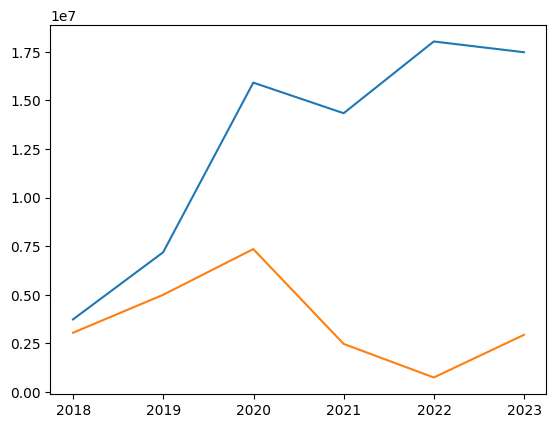

In [112]:
plt.plot(list(ex.keys()),list(ex.values()))
plt.plot(list(inv.keys()),list(inv.values()))